Import needed lib

In [1]:
import numpy as np
import pandas

from pandas           import read_csv
from matplotlib       import pyplot
from matplotlib.dates import DateFormatter, WeekdayLocator, drange, RRuleLocator, YEARLY, rrulewrapper, MonthLocator
from sklearn.pipeline import make_pipeline
from sklearn          import preprocessing
from sklearn.metrics  import explained_variance_score

from sklearn.model_selection import train_test_split

from sklearn.linear_model   import LinearRegression
from sklearn.ensemble       import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

Load dataset

In [2]:
names = ['Product_Code','Warehouse','Product_Category','Date','Order_Demand']
dataset_HDC = read_csv('../data/HistoricalProductDemand.csv', names=names)

Drop Nan items

In [3]:
dataset_HDC  = dataset_HDC.dropna()
print(dataset_HDC.head(10))

   Product_Code Warehouse Product_Category       Date  Order_Demand
0  Product_0993    Whse_J     Category_028  2012/7/27           100
1  Product_0979    Whse_J     Category_028  2012/1/19           500
2  Product_0979    Whse_J     Category_028   2012/2/3           500
3  Product_0979    Whse_J     Category_028   2012/2/9           500
4  Product_0979    Whse_J     Category_028   2012/3/2           500
5  Product_0979    Whse_J     Category_028  2012/4/19           500
6  Product_0979    Whse_J     Category_028   2012/6/5           500
7  Product_0979    Whse_J     Category_028  2012/6/27           500
8  Product_0979    Whse_J     Category_028  2012/7/23           500
9  Product_0979    Whse_J     Category_028  2012/8/29           500


Analyze data through visualization.
For the first one, we find the relationship between Date and Order Demand.

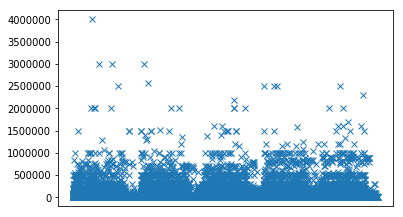

In [4]:
fig, ax = pyplot.subplots(1)
fig.autofmt_xdate()
pyplot.plot(dataset_HDC['Date'], dataset_HDC['Order_Demand'],'x')
xfmt = DateFormatter('%y')
ax.xaxis.set_major_formatter(xfmt)
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
ax.xaxis.set_major_locator(MonthLocator())
pyplot.show()

Analyze data through statistics.
For this one, we find the most significant attribute in this dataset.

In [5]:
print(dataset_HDC.Product_Code.value_counts())
print(dataset_HDC.Warehouse.value_counts())
print(dataset_HDC.Product_Category.value_counts())
print(dataset_HDC.Date.value_counts())

Product_1359    16936
Product_1295    10575
Product_1378     9770
Product_0620     9428
Product_1286     8888
Product_1382     8619
Product_1453     8503
Product_1294     8384
Product_1377     7872
Product_1287     7829
Product_1274     7048
Product_1016     6571
Product_1248     6348
Product_0613     6079
Product_1241     5476
Product_1456     5442
Product_1470     5084
Product_0031     5013
Product_1410     4828
Product_0608     4803
Product_1360     4801
Product_1451     4703
Product_1250     4622
Product_1381     4583
Product_1264     4519
Product_0033     4479
Product_1262     4478
Product_1452     4462
Product_1023     4381
Product_1463     4331
                ...  
Product_1595       11
Product_0647       11
Product_1793       10
Product_1619       10
Product_0237       10
Product_1525        9
Product_1915        9
Product_0360        8
Product_0577        7
Product_1019        7
Product_0244        7
Product_0240        7
Product_2009        7
Product_0438        6
Product_03

sort data by using date

In [6]:
dataset_HDC.sort_values(by = 'Date', inplace = True)

After comparing the differences in the data, we found that the types of Warehouses are less different.
There is almost no effect on the overall data. So we delete this part.

In [7]:
dataset_HDC.drop('Warehouse', axis = 1)

,Product_Code,Product_Category,Date,Order_Demand
44799,Product_0965,Category_006,2011/1/8,2
131429,Product_0412,Category_007,2011/10/20,2
131426,Product_0125,Category_011,2011/10/20,2
75193,Product_0642,Category_019,2011/10/31,3
131026,Product_2137,Category_009,2011/11/18,25
131032,Product_0288,Category_021,2011/11/18,50
131031,Product_0131,Category_021,2011/11/18,12
131027,Product_2138,Category_009,2011/11/18,49
131028,Product_2143,Category_009,2011/11/18,25
44450,Product_0980,Category_028,2011/11/18,4000


Since we found that the data set contains a large number of products, and each product is different, we must analyze different products so that the data obtained will be more effective.
Taking our statistical data as an example, product 1359 has the largest order demand.
From this perspective, we can focus our productivity on these products with high demand.
But for these high-demand products, we don't know if there is a big demand all the time.

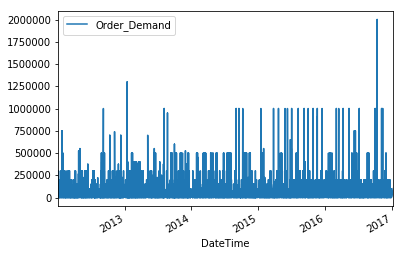

In [8]:
product = dataset_HDC[dataset_HDC.Product_Code == 'Product_1359'].copy()
product['DateTime'] = pandas.to_datetime(product.Date)
product.drop('Date', axis = 1)
product.plot(x = 'DateTime', y = 'Order_Demand')
pyplot.show()

Combine all order in the same day.
In order to make our data more useful, we find the sum of the order in the same day.

In [9]:
product = product.groupby(product.DateTime.dt.date).sum()
product.reset_index(inplace = True)
print(product.head(10))

     DateTime  Order_Demand
0  2012-01-05        702000
1  2012-01-06        676000
2  2012-01-10        783000
3  2012-01-11        200000
4  2012-01-12        284000
5  2012-01-13        532000
6  2012-01-16        479000
7  2012-01-17        435000
8  2012-01-18         29000
9  2012-01-19        477000


Then we show the relationship between date and order

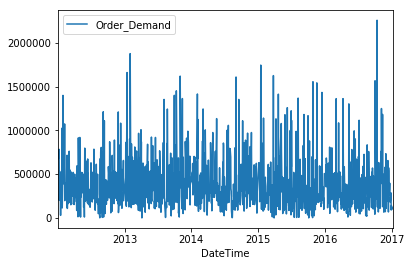

In [10]:
product.plot(x = 'DateTime', y = 'Order_Demand')
pyplot.show()

Initial Models
3 different models
Linear Regression
Gradient Boosting 
Neural Network

In [11]:
linear_regression = LinearRegression()
gradient_boost    = GradientBoostingRegressor(random_state=0)
neural_network    = MLPRegressor()

create training set and testing set

In [12]:
product['Year'] = product['DateTime'].apply(lambda x: x)
product['Day'] = product['DateTime'].apply(lambda x: x)
product['Month'] = product['DateTime'].apply(lambda x: x)
product['Year'] = product['Year'].apply(lambda x: x.year)
product['Day'] = product['Day'].apply(lambda x: x.day)
product['Month'] = product['Month'].apply(lambda x: x.month)
print(product.head(10))

x = product.drop(['Order_Demand', 'DateTime'], axis = 1)
y = product.Order_Demand.astype('float')

print(x.head(5))
print(y.head(5))


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.04)

     DateTime  Order_Demand  Year  Day  Month
0  2012-01-05        702000  2012    5      1
1  2012-01-06        676000  2012    6      1
2  2012-01-10        783000  2012   10      1
3  2012-01-11        200000  2012   11      1
4  2012-01-12        284000  2012   12      1
5  2012-01-13        532000  2012   13      1
6  2012-01-16        479000  2012   16      1
7  2012-01-17        435000  2012   17      1
8  2012-01-18         29000  2012   18      1
9  2012-01-19        477000  2012   19      1
   Year  Day  Month
0  2012    5      1
1  2012    6      1
2  2012   10      1
3  2012   11      1
4  2012   12      1
0    702000.0
1    676000.0
2    783000.0
3    200000.0
4    284000.0
Name: Order_Demand, dtype: float64


Training 3 different models

In [13]:
linear_regression.fit(x_train,y_train)
gradient_boost.fit(x_train,y_train)
neural_network.fit(x_train,y_train)

linear_regression.fit(x_test,y_test)
gradient_boost.fit(x_test,y_test)
neural_network.fit(x_test,y_test)

/Users/simonyang/Library/Python/2.7/lib/python/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

Testing 3 different models

In [14]:
prediction1 = linear_regression.predict(x_test)
prediction2 = gradient_boost.predict(x_test)
prediction3 = neural_network.predict(x_test)

Show the prediction results

In [15]:
print('LinearRegression',explained_variance_score(y_test, prediction1))
print('GradientBoostingRegressor',explained_variance_score(y_test, prediction2))
print('NeuralNetwork',explained_variance_score(y_test, prediction3))

('LinearRegression', 0.01888313030447053)
('GradientBoostingRegressor', 0.9192322420008311)
('NeuralNetwork', -1.194663203829549e-05)


As the result shown above, Gradient Boosting get the best result 91.9% accurate in prediction. 
And Linear Regression get a very low result, since the data distribution are not linear.